In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.patches as mpatches

In [8]:
# File to Load
Average_Wkly_Earning_data_to_load = "Resources/Average weekly ordinary time earnings, full time adults by industry_by gender_v2.csv"

# Read School and Student Data File and store into Pandas DataFrames
Average_Wkly_Earning_data_df = pd.read_csv(Average_Wkly_Earning_data_to_load)
Average_Wkly_Earning_data_df


,Industry,Nov-21,Nov-21.1,May-21,May-21.1,Nov-20,Nov-20.1,May-20,May-20.1,Nov-19,Nov-19.1,May-19,May-19.1,Nov-18,Nov-18.1
0,Mining,2724.9,2306.3,2748.7,2276.8,2695.9,2295.8,2695.9,2295.8,2668.0,2302.0,2617.0,2286.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1608.8,1394.4,1599.1,1397.8,1599.1,1397.8,1504.0,1349.0,1471.0,1310.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1941.2,1793.2,1986.8,1790.0,1986.8,1790.0,1940.0,1732.0,1924.0,1703.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1733.7,1445.1,1668.0,1394.4,1668.0,1394.4,1683.0,1389.0,1614.0,1397.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1707.1,1451.8,1641.5,1427.3,1641.5,1427.3,1654.0,1386.0,1637.0,1390.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1376.2,1227.9,1336.5,1220.4,1336.5,1220.4,1291.0,1181.0,1219.0,1172.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1252.6,1121.4,1217.0,1078.8,1217.0,1078.8,1220.0,1121.0,1207.0,1097.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1754.0,1487.5,1733.4,1494.3,1733.4,1494.3,1707.0,1436.0,1670.0,1410.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2231.9,1860.5,2158.1,1812.2,2158.1,1812.2,2121.0,1757.0,2120.0,1758.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2319.7,1759.7,2272.6,1736.5,2272.6,1736.5,2177.0,1694.0,2237.0,1691.0,2082.0,1335.0


In [9]:
Average_Wkly_Earning_data_df = Average_Wkly_Earning_data_df[["Industry","Nov-21","Nov-21.1","Nov-20","Nov-20.1","Nov-19","Nov-19.1","Nov-18","Nov-18.1"]]
Average_Wkly_Earning_data_df

,Industry,Nov-21,Nov-21.1,Nov-20,Nov-20.1,Nov-19,Nov-19.1,Nov-18,Nov-18.1
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0


In [10]:
Average_Wkly_Earning_data_Selected_Year_df = Average_Wkly_Earning_data_df.rename(columns={"Nov-21":"Nov21_Male","Nov-21.1":"Nov21_Female","Nov-20":"Nov20_Male","Nov-20.1":"Nov20_Female","Nov-19":"Nov19_Male","Nov-19.1":"Nov19_Female","Nov-18":"Nov18_Male","Nov-18.1":"Nov18_Female"})
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0


In [11]:
Average_Wkly_Earning_data_Selected_Year_df["2018 Total"] = (Average_Wkly_Earning_data_Selected_Year_df["Nov18_Male"]+Average_Wkly_Earning_data_Selected_Year_df["Nov18_Female"])/2
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,2018 Total
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,2427.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,1267.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,1757.5
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,1259.5
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,1333.5
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,769.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,555.5
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,1372.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,1657.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,1708.5


In [12]:
Average_Wkly_Earning_data_Selected_Year_df["2019 Total"] = (Average_Wkly_Earning_data_Selected_Year_df["Nov19_Male"]+Average_Wkly_Earning_data_Selected_Year_df["Nov19_Female"])/2
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,2018 Total,2019 Total
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,2427.0,2485.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,1267.0,1426.5
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,1757.5,1836.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,1259.5,1536.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,1333.5,1520.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,769.0,1236.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,555.5,1170.5
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,1372.0,1571.5
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,1657.0,1939.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,1708.5,1935.5


In [13]:
Average_Wkly_Earning_data_Selected_Year_df["2020 Total"] = (Average_Wkly_Earning_data_Selected_Year_df["Nov20_Male"]+Average_Wkly_Earning_data_Selected_Year_df["Nov20_Female"])/2
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,2018 Total,2019 Total,2020 Total
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,2427.0,2485.0,2495.85
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,1267.0,1426.5,1498.45
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,1757.5,1836.0,1888.40
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,1259.5,1536.0,1531.20
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,1333.5,1520.0,1534.40
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,769.0,1236.0,1278.45
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,555.5,1170.5,1147.90
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,1372.0,1571.5,1613.85
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,1657.0,1939.0,1985.15
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,1708.5,1935.5,2004.55


In [14]:
Average_Wkly_Earning_data_Selected_Year_df["2021 Total"] = (Average_Wkly_Earning_data_Selected_Year_df["Nov21_Male"]+Average_Wkly_Earning_data_Selected_Year_df["Nov21_Female"])/2
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,2018 Total,2019 Total,2020 Total,2021 Total
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,2427.0,2485.0,2495.85,2515.60
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,1267.0,1426.5,1498.45,1498.20
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,1757.5,1836.0,1888.40,1929.20
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,1259.5,1536.0,1531.20,1622.10
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,1333.5,1520.0,1534.40,1581.00
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,769.0,1236.0,1278.45,1302.70
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,555.5,1170.5,1147.90,1204.60
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,1372.0,1571.5,1613.85,1617.65
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,1657.0,1939.0,1985.15,2125.60
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,1708.5,1935.5,2004.55,2093.05


In [15]:
Average_Wkly_Earning_data_Selected_Year_df = Average_Wkly_Earning_data_Selected_Year_df[["Industry","2018 Total","2019 Total","2020 Total","2021 Total"]]
Average_Wkly_Earning_data_Selected_Year_df

,Industry,2018 Total,2019 Total,2020 Total,2021 Total
0,Mining,2427.0,2485.0,2495.85,2515.60
1,Manufacturing,1267.0,1426.5,1498.45,1498.20
2,"Electricity, gas, water & waste services",1757.5,1836.0,1888.40,1929.20
3,Construction,1259.5,1536.0,1531.20,1622.10
4,Wholesale trade,1333.5,1520.0,1534.40,1581.00
5,Retail trade,769.0,1236.0,1278.45,1302.70
6,Accommodation & food services,555.5,1170.5,1147.90,1204.60
7,"Transport, postal & warehousing",1372.0,1571.5,1613.85,1617.65
8,Information media & telecommunications,1657.0,1939.0,1985.15,2125.60
9,Financial & insurance services,1708.5,1935.5,2004.55,2093.05


In [16]:
#calculated from the csv file
Group_mean_2018=[1322.58]

In [17]:
#calculated from the csv file
Group_mean_2019=[1638.81]

In [18]:
#calculated from the csv file
Group_mean_2020=[1675.32]

In [19]:
#calculated from the csv file
Group_mean_2021=[1718.98]

In [20]:
Average_wkly_Earning_by_industry_2018_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","2018 Total"]]
Average_wkly_Earning_by_industry_2018_df 

,Industry,2018 Total
0,Mining,2427.0
1,Manufacturing,1267.0
2,"Electricity, gas, water & waste services",1757.5
3,Construction,1259.5
4,Wholesale trade,1333.5
5,Retail trade,769.0
6,Accommodation & food services,555.5
7,"Transport, postal & warehousing",1372.0
8,Information media & telecommunications,1657.0
9,Financial & insurance services,1708.5


In [21]:
#dropping the row "Total all industries"
Average_wkly_Earning_by_industry_2018_df = Average_wkly_Earning_by_industry_2018_df[Average_wkly_Earning_by_industry_2018_df['Industry'] != 'Total all industries']
Average_wkly_Earning_by_industry_2018_df 

,Industry,2018 Total
0,Mining,2427.0
1,Manufacturing,1267.0
2,"Electricity, gas, water & waste services",1757.5
3,Construction,1259.5
4,Wholesale trade,1333.5
5,Retail trade,769.0
6,Accommodation & food services,555.5
7,"Transport, postal & warehousing",1372.0
8,Information media & telecommunications,1657.0
9,Financial & insurance services,1708.5


In [22]:
Average_wkly_Earning_by_industry_2018_df.sort_values("2018 Total",ascending=False,inplace=True)
Average_wkly_Earning_by_industry_2018_df


C:\Users\use\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Industry,2018 Total
0,Mining,2427.0
2,"Electricity, gas, water & waste services",1757.5
9,Financial & insurance services,1708.5
8,Information media & telecommunications,1657.0
11,"Professional, scientific & technical services",1594.5
13,Public administration & safety,1508.0
7,"Transport, postal & warehousing",1372.0
4,Wholesale trade,1333.5
1,Manufacturing,1267.0
3,Construction,1259.5


In [23]:
Top_5_Average_wkly_Earning_by_industry_2018_df= Average_wkly_Earning_by_industry_2018_df.sort_values("2018 Total",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2018_df.head()

,Industry,2018 Total
0,Mining,2427.0
2,"Electricity, gas, water & waste services",1757.5
9,Financial & insurance services,1708.5
8,Information media & telecommunications,1657.0
11,"Professional, scientific & technical services",1594.5


In [24]:
Bottom_5_Average_wkly_Earning_by_industry_2018_df= Average_wkly_Earning_by_industry_2018_df.sort_values("2018 Total",ascending=True)
Bottom_5_Average_wkly_Earning_by_industry_2018_df.head()

,Industry,2018 Total
6,Accommodation & food services,555.5
5,Retail trade,769.0
16,Arts & recreation services,903.0
17,Other services,975.5
12,Administrative & support services,1075.0


In [25]:
Average_wkly_Earning_by_industry_2019_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","2019 Total"]]
Average_wkly_Earning_by_industry_2019_df 

,Industry,2019 Total
0,Mining,2485.0
1,Manufacturing,1426.5
2,"Electricity, gas, water & waste services",1836.0
3,Construction,1536.0
4,Wholesale trade,1520.0
5,Retail trade,1236.0
6,Accommodation & food services,1170.5
7,"Transport, postal & warehousing",1571.5
8,Information media & telecommunications,1939.0
9,Financial & insurance services,1935.5


In [26]:
#dropping the row "Total all industries"
Average_wkly_Earning_by_industry_2019_df = Average_wkly_Earning_by_industry_2019_df[Average_wkly_Earning_by_industry_2019_df['Industry'] != 'Total all industries']
Average_wkly_Earning_by_industry_2019_df

,Industry,2019 Total
0,Mining,2485.0
1,Manufacturing,1426.5
2,"Electricity, gas, water & waste services",1836.0
3,Construction,1536.0
4,Wholesale trade,1520.0
5,Retail trade,1236.0
6,Accommodation & food services,1170.5
7,"Transport, postal & warehousing",1571.5
8,Information media & telecommunications,1939.0
9,Financial & insurance services,1935.5


In [27]:
#Sorting
Average_wkly_Earning_by_industry_2019_df.sort_values("2019 Total",ascending=False,inplace=True)
Average_wkly_Earning_by_industry_2019_df

C:\Users\use\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Industry,2019 Total
0,Mining,2485.0
8,Information media & telecommunications,1939.0
9,Financial & insurance services,1935.5
11,"Professional, scientific & technical services",1838.5
2,"Electricity, gas, water & waste services",1836.0
14,Education & training,1831.5
13,Public administration & safety,1748.0
15,Health care & social assistance,1676.0
7,"Transport, postal & warehousing",1571.5
3,Construction,1536.0


In [28]:
Top_5_Average_wkly_Earning_by_industry_2019_df= Average_wkly_Earning_by_industry_2019_df.sort_values("2019 Total",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2019_df.head()


,Industry,2019 Total
0,Mining,2485.0
8,Information media & telecommunications,1939.0
9,Financial & insurance services,1935.5
11,"Professional, scientific & technical services",1838.5
2,"Electricity, gas, water & waste services",1836.0


In [29]:
Bottom_5_Average_wkly_Earning_by_industry_2019_df= Average_wkly_Earning_by_industry_2019_df.sort_values("2019 Total",ascending=True)
Bottom_5_Average_wkly_Earning_by_industry_2019_df.head()

,Industry,2019 Total
6,Accommodation & food services,1170.5
5,Retail trade,1236.0
17,Other services,1268.5
1,Manufacturing,1426.5
10,"Rental, hiring & real estate services",1440.5


In [30]:
Average_wkly_Earning_by_industry_2020_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","2020 Total"]]
Average_wkly_Earning_by_industry_2020_df

,Industry,2020 Total
0,Mining,2495.85
1,Manufacturing,1498.45
2,"Electricity, gas, water & waste services",1888.40
3,Construction,1531.20
4,Wholesale trade,1534.40
5,Retail trade,1278.45
6,Accommodation & food services,1147.90
7,"Transport, postal & warehousing",1613.85
8,Information media & telecommunications,1985.15
9,Financial & insurance services,2004.55


In [31]:
#dropping the row "Total all industries"
Average_wkly_Earning_by_industry_2020_df = Average_wkly_Earning_by_industry_2020_df[Average_wkly_Earning_by_industry_2020_df['Industry'] != 'Total all industries']
Average_wkly_Earning_by_industry_2020_df

,Industry,2020 Total
0,Mining,2495.85
1,Manufacturing,1498.45
2,"Electricity, gas, water & waste services",1888.40
3,Construction,1531.20
4,Wholesale trade,1534.40
5,Retail trade,1278.45
6,Accommodation & food services,1147.90
7,"Transport, postal & warehousing",1613.85
8,Information media & telecommunications,1985.15
9,Financial & insurance services,2004.55


In [32]:
#Sorting
Average_wkly_Earning_by_industry_2020_df.sort_values("2020 Total",ascending=False,inplace=True)
Average_wkly_Earning_by_industry_2020_df

C:\Users\use\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Industry,2020 Total
0,Mining,2495.85
9,Financial & insurance services,2004.55
8,Information media & telecommunications,1985.15
11,"Professional, scientific & technical services",1932.15
2,"Electricity, gas, water & waste services",1888.40
14,Education & training,1876.85
13,Public administration & safety,1815.70
15,Health care & social assistance,1760.65
7,"Transport, postal & warehousing",1613.85
4,Wholesale trade,1534.40


In [33]:
Top_5_Average_wkly_Earning_by_industry_2020_df= Average_wkly_Earning_by_industry_2020_df.sort_values("2020 Total",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2020_df.head()

,Industry,2020 Total
0,Mining,2495.85
9,Financial & insurance services,2004.55
8,Information media & telecommunications,1985.15
11,"Professional, scientific & technical services",1932.15
2,"Electricity, gas, water & waste services",1888.40


In [34]:
Bottom_5_Average_wkly_Earning_by_industry_2020_df= Average_wkly_Earning_by_industry_2020_df.sort_values("2020 Total",ascending=True)
Bottom_5_Average_wkly_Earning_by_industry_2020_df.head()

,Industry,2020 Total
6,Accommodation & food services,1147.90
5,Retail trade,1278.45
17,Other services,1326.50
16,Arts & recreation services,1446.70
1,Manufacturing,1498.45


In [35]:
Average_wkly_Earning_by_industry_2021_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","2021 Total"]]
Average_wkly_Earning_by_industry_2021_df

,Industry,2021 Total
0,Mining,2515.60
1,Manufacturing,1498.20
2,"Electricity, gas, water & waste services",1929.20
3,Construction,1622.10
4,Wholesale trade,1581.00
5,Retail trade,1302.70
6,Accommodation & food services,1204.60
7,"Transport, postal & warehousing",1617.65
8,Information media & telecommunications,2125.60
9,Financial & insurance services,2093.05


In [36]:
#dropping the row "Total all industries"
Average_wkly_Earning_by_industry_2021_df = Average_wkly_Earning_by_industry_2021_df[Average_wkly_Earning_by_industry_2021_df['Industry'] != 'Total all industries']
Average_wkly_Earning_by_industry_2021_df

,Industry,2021 Total
0,Mining,2515.60
1,Manufacturing,1498.20
2,"Electricity, gas, water & waste services",1929.20
3,Construction,1622.10
4,Wholesale trade,1581.00
5,Retail trade,1302.70
6,Accommodation & food services,1204.60
7,"Transport, postal & warehousing",1617.65
8,Information media & telecommunications,2125.60
9,Financial & insurance services,2093.05


In [37]:
#sorting by value
Average_wkly_Earning_by_industry_2021_df.sort_values("2021 Total",ascending=False,inplace=True)
Average_wkly_Earning_by_industry_2021_df

C:\Users\use\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Industry,2021 Total
0,Mining,2515.60
8,Information media & telecommunications,2125.60
9,Financial & insurance services,2093.05
11,"Professional, scientific & technical services",1990.20
2,"Electricity, gas, water & waste services",1929.20
14,Education & training,1907.00
13,Public administration & safety,1879.50
15,Health care & social assistance,1776.45
3,Construction,1622.10
7,"Transport, postal & warehousing",1617.65


In [38]:
Top_5_Average_wkly_Earning_by_industry_2021_df= Average_wkly_Earning_by_industry_2021_df.sort_values("2021 Total",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2021_df.head()

,Industry,2021 Total
0,Mining,2515.60
8,Information media & telecommunications,2125.60
9,Financial & insurance services,2093.05
11,"Professional, scientific & technical services",1990.20
2,"Electricity, gas, water & waste services",1929.20


In [39]:
Bottom_5_Average_wkly_Earning_by_industry_2021_df= Average_wkly_Earning_by_industry_2021_df.sort_values("2021 Total",ascending=True)
Bottom_5_Average_wkly_Earning_by_industry_2021_df.head()

,Industry,2021 Total
6,Accommodation & food services,1204.6
5,Retail trade,1302.7
17,Other services,1320.7
12,Administrative & support services,1488.2
1,Manufacturing,1498.2


In [40]:
#Set X axis and tick loctions
x_axis = np.arange(len(Average_wkly_Earning_by_industry_2018_df))


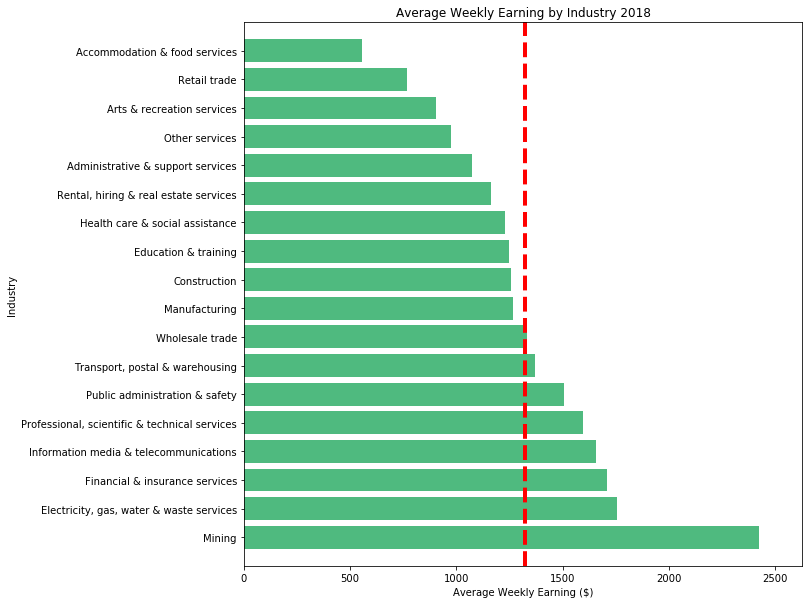

<Figure size 432x288 with 0 Axes>

In [41]:
#Create a bar horizontal chart for 2018

plt.figure(figsize=(10,10))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2018_df["2018 Total"],color="mediumseagreen",alpha=0.9)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2018_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2018_df["2018 Total"])+200)

#Add a vertical line to show the group mean
plt.axvline(Group_mean_2018,ls="--", color='r',lw=4)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2018")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.tight_layout
plt.show()

plt.savefig("Images/Average Weekly Earning by Industry 2018")


In [42]:
7

7

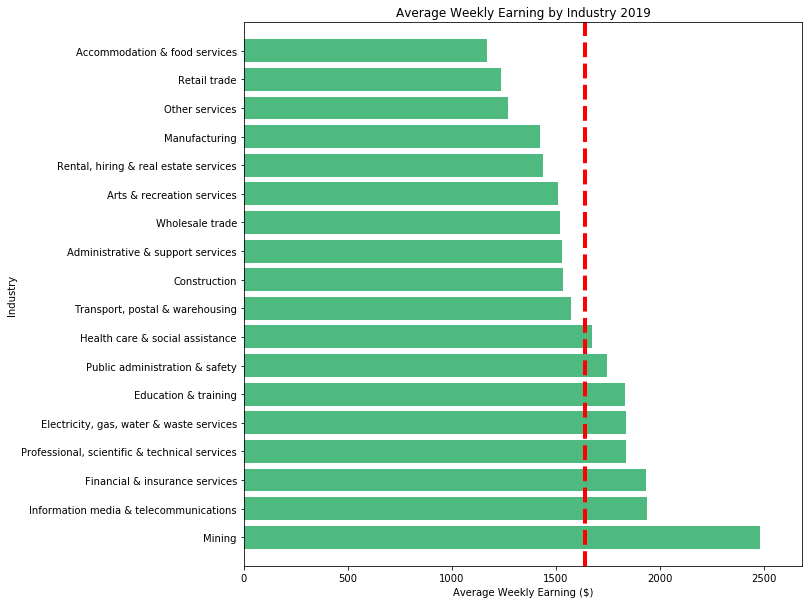

<Figure size 432x288 with 0 Axes>

In [43]:
#Create a bar horizontal chart for 2019

plt.figure(figsize=(10,10))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2019_df["2019 Total"],color="mediumseagreen",alpha=0.9)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2019_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2019_df["2019 Total"])+200)

#Add a vertical line to show the group mean
plt.axvline(Group_mean_2019,ls="--", color='r',lw=4)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2019")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.tight_layout
plt.show()

plt.savefig("Images/Average Weekly Earning by Industry 2019")

8

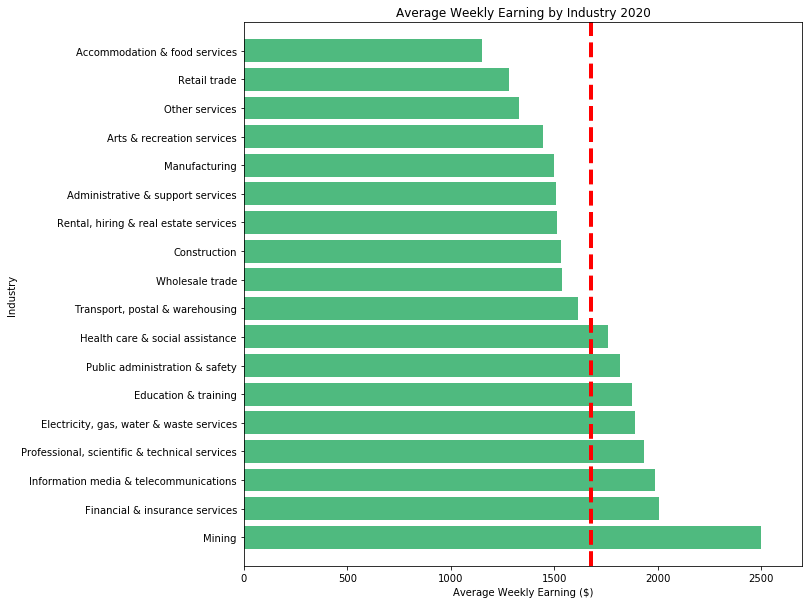

<Figure size 432x288 with 0 Axes>

In [44]:
#Create a bar horizontal chart for 2020

plt.figure(figsize=(10,10))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2020_df["2020 Total"],color="mediumseagreen",alpha=0.9)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2020_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2020_df["2020 Total"])+200)

#Add a vertical line to show the group mean
plt.axvline(Group_mean_2020,ls="--", color='r',lw=4)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2020")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.tight_layout
plt.show()

plt.savefig("Images/Average Weekly Earning by Industry 2020")

8

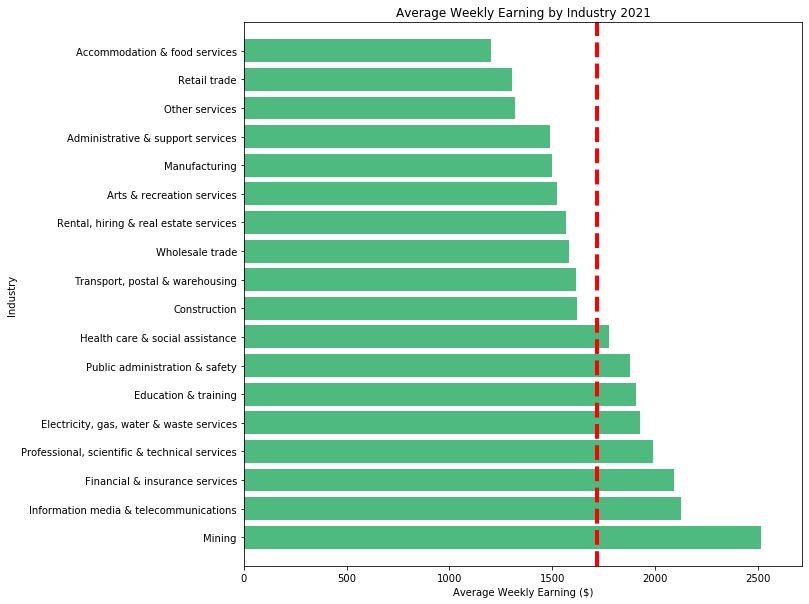

<Figure size 432x288 with 0 Axes>

In [45]:
#Create a bar horizontal chart for 2021

plt.figure(figsize=(10,10))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2021_df["2021 Total"],color="mediumseagreen",alpha=0.9)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2021_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2021_df["2021 Total"])+200)

#Add a vertical line to show the group mean
plt.axvline(Group_mean_2021,ls="--", color='r',lw=4)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2021")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.tight_layout
plt.show()

plt.savefig("Images/Average Weekly Earning by Industry 2021")

In [46]:
8

8

In [47]:
#Recall the dataframe

Average_Wkly_Earning_data_Selected_Year_df

,Industry,2018 Total,2019 Total,2020 Total,2021 Total
0,Mining,2427.0,2485.0,2495.85,2515.60
1,Manufacturing,1267.0,1426.5,1498.45,1498.20
2,"Electricity, gas, water & waste services",1757.5,1836.0,1888.40,1929.20
3,Construction,1259.5,1536.0,1531.20,1622.10
4,Wholesale trade,1333.5,1520.0,1534.40,1581.00
5,Retail trade,769.0,1236.0,1278.45,1302.70
6,Accommodation & food services,555.5,1170.5,1147.90,1204.60
7,"Transport, postal & warehousing",1372.0,1571.5,1613.85,1617.65
8,Information media & telecommunications,1657.0,1939.0,1985.15,2125.60
9,Financial & insurance services,1708.5,1935.5,2004.55,2093.05


In [48]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 18 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2018 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2018 Total"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

C:\Users\use\AppData\Local\Temp/ipykernel_6752/3786190301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Average_Wkly_Earning_data_Selected_Year_df["Changes % 18 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2018 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2018 Total"])*100,2)


,Industry,2018 Total,2019 Total,2020 Total,2021 Total,Changes % 18 v 21
0,Mining,2427.0,2485.0,2495.85,2515.60,3.65
1,Manufacturing,1267.0,1426.5,1498.45,1498.20,18.25
2,"Electricity, gas, water & waste services",1757.5,1836.0,1888.40,1929.20,9.77
3,Construction,1259.5,1536.0,1531.20,1622.10,28.79
4,Wholesale trade,1333.5,1520.0,1534.40,1581.00,18.56
5,Retail trade,769.0,1236.0,1278.45,1302.70,69.40
6,Accommodation & food services,555.5,1170.5,1147.90,1204.60,116.85
7,"Transport, postal & warehousing",1372.0,1571.5,1613.85,1617.65,17.90
8,Information media & telecommunications,1657.0,1939.0,1985.15,2125.60,28.28
9,Financial & insurance services,1708.5,1935.5,2004.55,2093.05,22.51


In [49]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 19 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2019 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2019 Total"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

C:\Users\use\AppData\Local\Temp/ipykernel_6752/3628686972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Average_Wkly_Earning_data_Selected_Year_df["Changes % 19 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2019 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2019 Total"])*100,2)


,Industry,2018 Total,2019 Total,2020 Total,2021 Total,Changes % 18 v 21,Changes % 19 v 21
0,Mining,2427.0,2485.0,2495.85,2515.60,3.65,1.23
1,Manufacturing,1267.0,1426.5,1498.45,1498.20,18.25,5.03
2,"Electricity, gas, water & waste services",1757.5,1836.0,1888.40,1929.20,9.77,5.08
3,Construction,1259.5,1536.0,1531.20,1622.10,28.79,5.61
4,Wholesale trade,1333.5,1520.0,1534.40,1581.00,18.56,4.01
5,Retail trade,769.0,1236.0,1278.45,1302.70,69.40,5.40
6,Accommodation & food services,555.5,1170.5,1147.90,1204.60,116.85,2.91
7,"Transport, postal & warehousing",1372.0,1571.5,1613.85,1617.65,17.90,2.94
8,Information media & telecommunications,1657.0,1939.0,1985.15,2125.60,28.28,9.62
9,Financial & insurance services,1708.5,1935.5,2004.55,2093.05,22.51,8.14


In [50]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 20 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2020 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2020 Total"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

C:\Users\use\AppData\Local\Temp/ipykernel_6752/3596899680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Average_Wkly_Earning_data_Selected_Year_df["Changes % 20 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["2021 Total"]-Average_Wkly_Earning_data_Selected_Year_df["2020 Total"])/Average_Wkly_Earning_data_Selected_Year_df["2020 Total"])*100,2)


,Industry,2018 Total,2019 Total,2020 Total,2021 Total,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
0,Mining,2427.0,2485.0,2495.85,2515.60,3.65,1.23,0.79
1,Manufacturing,1267.0,1426.5,1498.45,1498.20,18.25,5.03,-0.02
2,"Electricity, gas, water & waste services",1757.5,1836.0,1888.40,1929.20,9.77,5.08,2.16
3,Construction,1259.5,1536.0,1531.20,1622.10,28.79,5.61,5.94
4,Wholesale trade,1333.5,1520.0,1534.40,1581.00,18.56,4.01,3.04
5,Retail trade,769.0,1236.0,1278.45,1302.70,69.40,5.40,1.90
6,Accommodation & food services,555.5,1170.5,1147.90,1204.60,116.85,2.91,4.94
7,"Transport, postal & warehousing",1372.0,1571.5,1613.85,1617.65,17.90,2.94,0.24
8,Information media & telecommunications,1657.0,1939.0,1985.15,2125.60,28.28,9.62,7.08
9,Financial & insurance services,1708.5,1935.5,2004.55,2093.05,22.51,8.14,4.41


In [51]:
Monitor_the_changes_df = Average_Wkly_Earning_data_Selected_Year_df[["Industry","Changes % 18 v 21","Changes % 19 v 21","Changes % 20 v 21"]]
Monitor_the_changes_df

,Industry,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
0,Mining,3.65,1.23,0.79
1,Manufacturing,18.25,5.03,-0.02
2,"Electricity, gas, water & waste services",9.77,5.08,2.16
3,Construction,28.79,5.61,5.94
4,Wholesale trade,18.56,4.01,3.04
5,Retail trade,69.40,5.40,1.90
6,Accommodation & food services,116.85,2.91,4.94
7,"Transport, postal & warehousing",17.90,2.94,0.24
8,Information media & telecommunications,28.28,9.62,7.08
9,Financial & insurance services,22.51,8.14,4.41


In [52]:
Monitor_the_changes_sorted_df = Monitor_the_changes_df.sort_values("Changes % 18 v 21", ascending=False)
Monitor_the_changes_sorted_df

,Industry,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
6,Accommodation & food services,116.85,2.91,4.94
5,Retail trade,69.40,5.40,1.90
16,Arts & recreation services,68.85,0.91,5.40
14,Education & training,52.62,4.12,1.61
15,Health care & social assistance,44.31,5.99,0.90
18,Total all industries,39.91,5.48,2.12
12,Administrative & support services,38.44,-2.64,-1.23
17,Other services,35.39,4.12,-0.44
10,"Rental, hiring & real estate services",34.52,8.65,3.49
3,Construction,28.79,5.61,5.94


In [53]:
#dropping the row "Total all industries"
Monitor_the_changes_sorted_df = Monitor_the_changes_sorted_df[Monitor_the_changes_sorted_df['Industry'] != 'Total all industries']
Monitor_the_changes_sorted_df.head()

,Industry,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
6,Accommodation & food services,116.85,2.91,4.94
5,Retail trade,69.40,5.40,1.90
16,Arts & recreation services,68.85,0.91,5.40
14,Education & training,52.62,4.12,1.61
15,Health care & social assistance,44.31,5.99,0.90


#With the 2018, it was significantly lower value in Retail Trade and Accommodation&Food Services

Summary of Top 5 performing Industry in terms of the average weekly earning.  The position of these 5 industries has been steady for the past 4 years, with Male lead in all 18 industries
1. Mining
2. Financial & Insurance Services
3. Information media & Telecommunications
4. Professional,sientific & Tech sercices
5. Education & Training

Summary of Bottom 5 performing Industry in terms of the average weekly earning.  Accommodation & Food Services, Retails and Art had been consistently in the bottom 5 industries
1. Accommodation & Food Sercies
2. Other services
3. Retail trade
4. Art
5. Admin and Support services

Positive news ****
During COVID, some industries have recorded significant uplift or wages increment (adjustment)

Accommodation & food services   116.85% up from 2018
Retail trade                    69.40%  up from 2018
Arts & recreation services      68.85   up from 2018
Education & training            52.62   up from 2018

In [54]:
#Leading survey from Gallup
#url=https://www.gallup.com/workplace/389807/top-things-employees-next-job.aspx

#url=https://hbr.org/2021/05/what-your-future-employees-want-most

SyntaxError: invalid syntax (Temp/ipykernel_6752/4039178009.py, line 2)

In [95]:
# File to Load
Reasons_LEAVE_OR_LOST_job = "Resources/Chart 8_ Main reason left or lost a job.csv"

In [96]:
Reasons_df = pd.read_csv(Reasons_LEAVE_OR_LOST_job)
Reasons_df


,Reasons To Leave Or Lost A Job,Year ending Feb 2021
0,Retrenched,21.7
1,Job ended,12.7
2,Illness,4.2
3,Dismissed,1.1
4,Better Job Prospect,21.7
5,"Poor work, pay or hours",10.5
6,Family reasons,8.3
7,Retired,3.7
8,Holiday job\nback to studies,2.5
9,Start own business,1.0


In [97]:
x = Reasons_df['Reasons To Leave Or Lost A Job']
y = Reasons_df['Year ending Feb 2021']


Text(0.5, 1.0, 'Reasons To Leave Or Lost A Job - Year Ending Feb 2021')

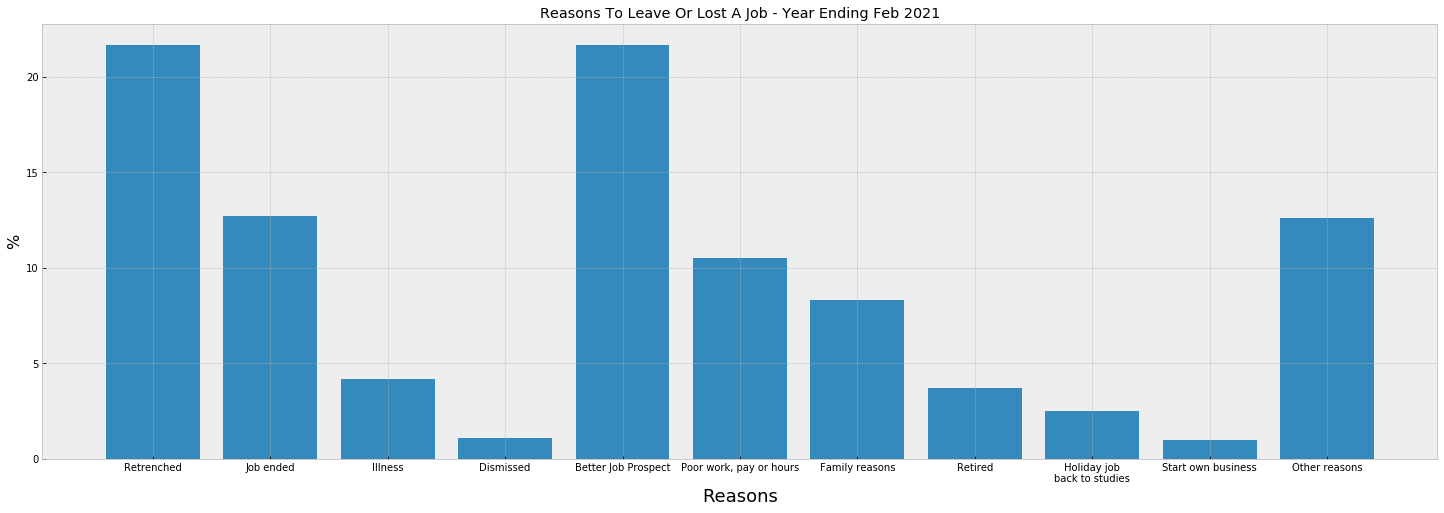

In [98]:
#Create Pie Chart
plt.figure(figsize=(25,8))
plt.bar(x,y)
plt.xlabel("Reasons", fontsize=18, )
plt.ylabel("%",fontsize=16)
plt.title("Reasons To Leave Or Lost A Job - Year Ending Feb 2021")
p
